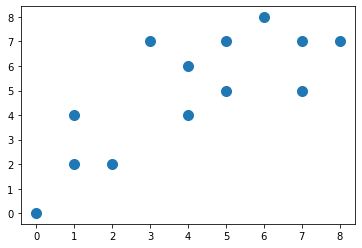

In [4]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1,2],[7, 5],[5, 7],[7, 7],[4, 4],[4, 6],[1, 4],[0, 0],[2, 2],[8, 7],[6, 8],[5,
5],[3, 7]], dtype=float)
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

In [2]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1000, random_state=1).fit(X)

[1.6 2.4] [5.625 6.5  ]


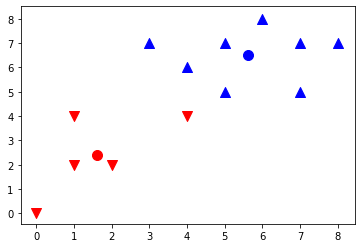

In [3]:
c0, c1 = model.cluster_centers_
print(c0, c1)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
plt.show()

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1000, random_state=1).fit(X)

[4.2 5.8] [7.   6.75] [1. 2.]


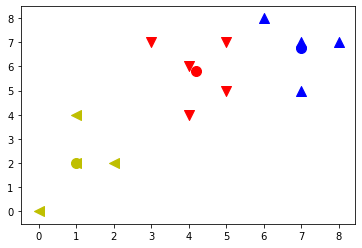

In [6]:
c0, c1, c2 = model.cluster_centers_
print(c0, c1, c2)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(X[model.labels_==2,0], X[model.labels_==2,1], s=100, marker='<', c='y')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
plt.scatter(c2[0], c2[1], s=100, c="y")
plt.show()

In [7]:
#거리 기반 유사도 Matrix 계산
from sklearn.metrics import pairwise_distances
dist_out = 1-pairwise_distances(X)

In [8]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation(preference=-50).fit(dist_out)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

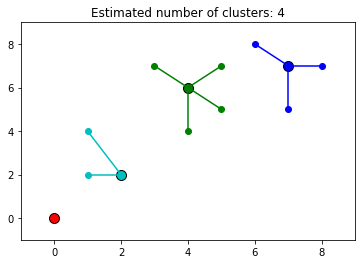

In [9]:
import matplotlib.pyplot as plt
from itertools import cycle
import pylab
plt.close('all')
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + 'o')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
        markeredgecolor='k', markersize=10)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: %d' % n_clusters_)
pylab.axis([-1.0,9.0,-1.0,9.0])
plt.show()

In [10]:
#Cosine 유사도 계산
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
dist_out = 1-pairwise_distances(X, metric="cosine")

In [11]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation(preference=-50).fit(dist_out)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

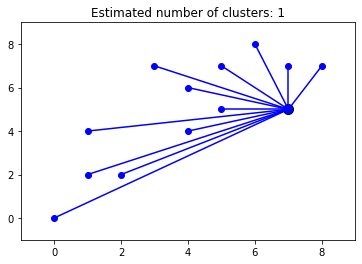

In [12]:
import matplotlib.pyplot as plt
from itertools import cycle
import pylab
plt.close('all')
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + 'o')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,markeredgecolor='k', markersize=10)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: %d' % n_clusters_)
pylab.axis([-1.0,9.0,-1.0,9.0])
plt.show()

In [13]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2, min_samples=3).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

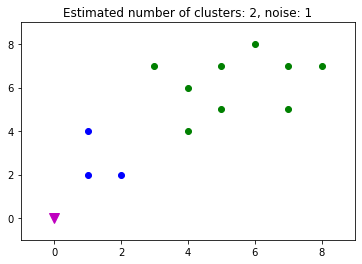

In [14]:
import matplotlib.pyplot as plt
from itertools import cycle
import pylab
colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    plt.plot(X[class_members, 0], X[class_members, 1], col + 'o')
plt.plot(X[labels==-1,0],X[labels==-1,1], 'm' + 'v',markersize=10)
red=(1 if -1 in labels else 0)
plt.title('Estimated number of clusters: %d, noise: %d' % (n_clusters_, red))
pylab.axis([-1.0,9.0,-1.0,9.0])
plt.show()